# Introduction to Python and NumPy
The best way to learn a programming language is to solve questions that language, rather than just reading a list of functions.  We start using the library NumPy right away, in part because it is used in nearly every data science computation in Python, and in part because much of its syntax will remind you of Matlab from Math 9.

## Motivating question for this notebook

*  If you choose three random numbers $0 \leq x,y,z \leq 2$, what is the probability that $z > x^2 + y^2$?  

The goal of this notebook is to estimate an answer to the above question using a random simulation in Python.  As an optional section, we first compute the exact answer using calculus.

## Mathematical computation of the exact answer
This section contains no Python and can be skipped.

One way to phrase this question is: 
* If you choose a random point in the cube $0 \leq x,y,z \leq 2$, what is the probability that it lies above the paraboloid $z = x^2 + y^2$?

Here is a picture:

<img src = '../images/quarter_paraboloid.png' width = 400>

> Remark: Python does not have great resources for 3D-plotting.  The syntax for making 3D plots can feel awkward, and sometimes there can be bugs, especially if multiple surfaces are plotted on the same axes. The plots shown here *were* made in Python, and if you want to see the code, it's at the bottom of this notebook, but you're encouraged not to focus on it.  We will do plenty of plotting in Math 10, but not much 3D plotting.

Because 8 is the total volume of the cube, the probability is $\frac{V}{8}$, where V is the volume of the region in the cube which lies above the paraboloid.  Let's call that region $R$.  By definition of $R$ as lying inside the cube, we have $z \leq 2$ for all points in $R$, so $R$ lies inside the cylinder $x^2 + y^2 = 2$.  We only need to consider the quarter cylinder, where $x, y \geq 0$.

<img src = '../images/paraboloid_cylinder.png' width = 400>

The total volume of this quarter cylinder of radius $\sqrt{2}$ in the range $0 \leq z \leq 2$ is 

$$
\frac{1}{4} \pi r^2 h = \frac{1}{4} \pi \cdot (\sqrt{2})^2 \cdot 2 = \pi,
$$

so, the volume of $R$ is $\pi - W$, where $W$ is the volume of the region in the cylinder *beneath* the paraboloid.  Using polar coordinates, the volume of $R$ is

$$
\pi - \int_0^{\pi/2} \int_0^{\sqrt{2}} r^2 \, r dr\, d\theta = \pi - \int_0^{\pi/2}  \frac{\sqrt{2}^{\, 4}}{4} \,d\theta = \pi - \frac{\pi}{2} = \frac{\pi}{2}
$$

Thus the probability is 
$$
p = \frac{V}{8} = \frac{\pi/2}{8} = \frac{\pi}{16}
$$



## First simulation, without NumPy
To start out, we estimate the above probability using standard Python.  We do import two libraries, `import random` and `import math`, but these are "standard" Python libraries which do not need to be installed.  Use use the random library to produce random numbers, and the only thing we use the math library for, is to compare our computation to the numerical value of pi at the end of the section.  We will not use either the random library nor the math library much during Math 10, because the NumPy library contains much of the same functionality.

In [29]:
import random
import math

In [30]:
# Uniformly distributed random numbers between 0 and 1:
random.random()

0.8240756031196971

In [31]:
# Between 0 and 2:
for i in range(10):
    print(2*random.random())

0.5993097342505531
0.05447307427332104
1.5053037549325765
1.1778560226453254
1.6150401710862725
0.5997694184405367
0.008402036037054916
0.6054866557517571
0.6597944562650448
0.0037333231439975467


In [56]:
# Defining our own function.  The input n represents the number of experiments.
def sim1(n):
    s = 0
    for i in range(n):
        x = 2*random.random()
        y = 2*random.random()
        z = 2*random.random()
        if z > x**2 + y**2:
            s = s+1
    return s/n

In [57]:
sim1(100)

0.19

In [58]:
sim1(10**7)

0.1962748

In [37]:
math.pi/16

0.19634954084936207

## Second simulation, using NumPy

In [39]:
import numpy as np

In [40]:
rng = np.random.default_rng()

In [42]:
# The equivalent of random.random from above.
rng.random()

0.26290136129117214

In [43]:
# An easy way to produce many uniformly distributed random numbers between 0 and 2:
2*rng.random(10)

array([1.07145793, 0.06929231, 0.41969907, 1.55952432, 1.08978916,
       0.96045216, 1.73757525, 0.02414739, 1.32068768, 1.83150052])

In [45]:
# In any shape we want.  Let's try to make a 10x3 matrix of these random numbers.
2*rng.random(10,3)

TypeError: Cannot interpret '3' as a data type

In [46]:
# What did we do wrong?
help(rng.random)

Help on built-in function random:

random(...) method of numpy.random._generator.Generator instance
    random(size=None, dtype=np.float64, out=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random` by `(b-a)` and add `a`::
    
      (b - a) * random() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    dtype : dtype, optional
        Desired dtype of the result, only `float64` and `float32` are supported.
        Byteorder must be native. The default value is np.float64.
    out : ndarray, optional
        Alternative output array in which to place the result. If size is not None,
        it

In [49]:
2*rng.random((10,3))

array([[1.7128546 , 0.3435023 , 1.58578495],
       [1.99936272, 1.92524499, 1.12248082],
       [1.51579462, 1.14118814, 1.46195489],
       [0.09464797, 1.46565845, 0.60460671],
       [0.30299164, 0.44693628, 0.19813112],
       [1.43981445, 0.34120871, 1.81337862],
       [0.02759656, 1.32361359, 1.02840878],
       [0.96830448, 1.79168076, 1.59239612],
       [0.87598227, 1.42945261, 0.30011283],
       [0.45753171, 1.66658828, 1.42704932]])

In [59]:
# If we want to refer to this matrix (or array) later, we should save it with a variable name.
A = 2*rng.random((10,3))
A

array([[0.68182559, 1.31200686, 1.16926676],
       [0.17133945, 1.89512003, 1.2974074 ],
       [0.32374294, 1.48223843, 1.36032332],
       [0.59032605, 1.72062666, 1.63516668],
       [0.29366791, 0.1220626 , 1.98812333],
       [1.13652652, 0.72629387, 1.05212918],
       [1.06991038, 1.65071163, 1.52116011],
       [0.1525733 , 0.77482757, 0.54855451],
       [0.10108047, 1.64977749, 0.53124131],
       [1.238491  , 0.20126273, 1.45197419]])

In [60]:
# The first ("zero"-th in Python terminology) column, with each entry squared.
A[:,0]**2

array([0.46488613, 0.02935721, 0.10480949, 0.34848485, 0.08624084,
       1.29169252, 1.14470822, 0.02327861, 0.01021726, 1.53385996])

In [54]:
# If the scientific notation is confusing:
np.set_printoptions(suppress=True)

In [61]:
A[:,0]**2

array([0.46488613, 0.02935721, 0.10480949, 0.34848485, 0.08624084,
       1.29169252, 1.14470822, 0.02327861, 0.01021726, 1.53385996])

In [63]:
A[:,0]**2 + A[:,1]**2 < A[:,2]

array([False, False, False, False,  True, False, False, False, False,
       False])

In [64]:
np.count_nonzero(A[:,0]**2 + A[:,1]**2 < A[:,2])

1

In [65]:
def sim2(n):
    A = 2*rng.random((n,3))
    return np.count_nonzero(A[:,0]**2 + A[:,1]**2 < A[:,2])/n

In [66]:
sim2(100)

0.19

In [67]:
sim2(10**7)

0.1964089

## Comparing the speed of our two simulation functions
We use a so-called *magic* function.  We could accomplish the same thing in basic Python, but this syntax is specific to notebooks.

In [68]:
%%timeit
sim1(10**7)

4.07 s ± 49.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%%timeit
sim2(10**7)

217 ms ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Our NumPy function is over 10 times faster.

In [75]:
# 10**8 experiments is often too many, but for this simple procedure it works okay.
p = sim2(10**8)
p

0.19635454

In [74]:
# We don't need the math library to get the numerical value of pi, we can also use NumPy.
np.pi/16

0.19634954084936207

## Bonus section, which should probably be skipped: Code to generate 3D plots

In [5]:
?ax.plot_surface

<IPython.core.display.Javascript object>


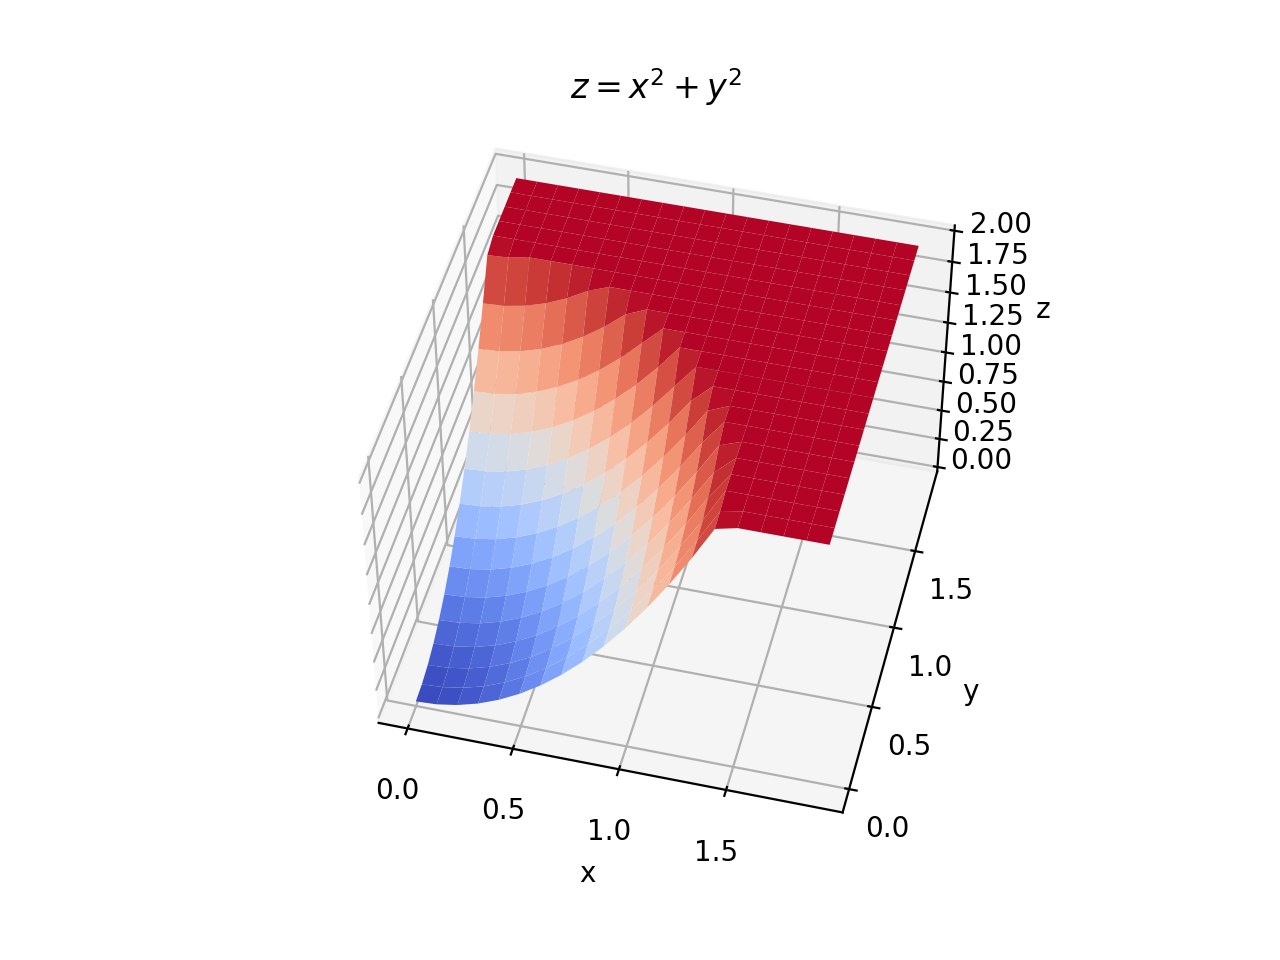

In [1]:
%matplotlib notebook
#inline is a more common option than notebook, but notebook allows us to rotate the plot.
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("$z = x^2 + y^2$")
# Make data.
X = np.arange(0, 2, 0.1)
Y = np.arange(0, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2
Z[Z>2] = 2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)


<IPython.core.display.Javascript object>


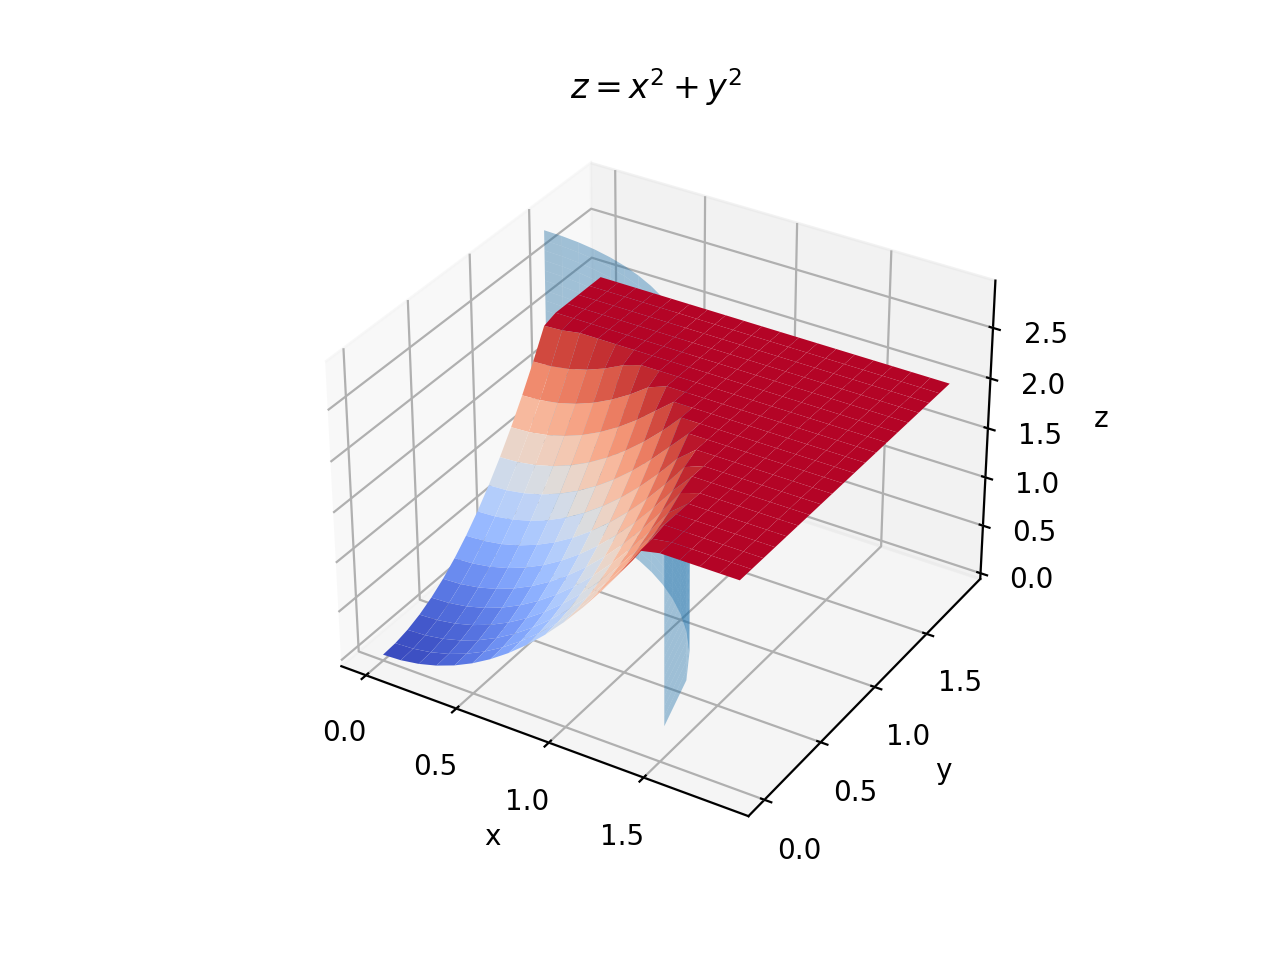

In [20]:
%matplotlib notebook
#inline is a more common option than notebook, but notebook allows us to rotate the plot.
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("$z = x^2 + y^2$")
# Make data.
X1 = np.arange(0, np.sqrt(2), 0.1)
Z1 = np.arange(0, 3, 0.1)
X1, Z1 = np.meshgrid(X1, Z1)
Y1 = np.sqrt(2-X1**2)
ax.plot_surface(X1, Y1, Z1, alpha=0.4)
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
plt.show(ax)

In [10]:
Y1

array([[1.41421356, 1.4106736 , 1.4       , 1.3820275 , 1.356466  ,
        1.32287566, 1.28062485, 1.22882057, 1.16619038, 1.09087121,
        1.        , 0.88881944, 0.74833148, 0.55677644, 0.2       ],
       [1.41421356, 1.4106736 , 1.4       , 1.3820275 , 1.356466  ,
        1.32287566, 1.28062485, 1.22882057, 1.16619038, 1.09087121,
        1.        , 0.88881944, 0.74833148, 0.55677644, 0.2       ],
       [1.41421356, 1.4106736 , 1.4       , 1.3820275 , 1.356466  ,
        1.32287566, 1.28062485, 1.22882057, 1.16619038, 1.09087121,
        1.        , 0.88881944, 0.74833148, 0.55677644, 0.2       ],
       [1.41421356, 1.4106736 , 1.4       , 1.3820275 , 1.356466  ,
        1.32287566, 1.28062485, 1.22882057, 1.16619038, 1.09087121,
        1.        , 0.88881944, 0.74833148, 0.55677644, 0.2       ],
       [1.41421356, 1.4106736 , 1.4       , 1.3820275 , 1.356466  ,
        1.32287566, 1.28062485, 1.22882057, 1.16619038, 1.09087121,
        1.        , 0.88881944, 0.74833148, 

In [5]:
X.reshape(-1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5,
       0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1,
       1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 0. , 0.1, 0.2, 0.3, 0.4,
       0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ,
       1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 0. , 0.1, 0.2, 0.3,
       0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
       1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 0. , 0.1, 0.2,
       0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
       0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 0.

In [2]:
import numpy as np

In [2]:
rng = np.random.default_rng()

In [4]:
rng

Generator(PCG64) at 0x7FE640338F20

In [5]:
type(rng)

numpy.random._generator.Generator

In [7]:
rng.random()

0.4820347181401501

In [8]:
help(rng.random)

Help on built-in function random:

random(...) method of numpy.random._generator.Generator instance
    random(size=None, dtype=np.float64, out=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random` by `(b-a)` and add `a`::
    
      (b - a) * random() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    dtype : dtype, optional
        Desired dtype of the result, only `float64` and `float32` are supported.
        Byteorder must be native. The default value is np.float64.
    out : ndarray, optional
        Alternative output array in which to place the result. If size is not None,
        it

In [54]:
%%time
# First do this using for loops
import random
exps = 10**7
success = 0
for i in range(exps):
    x = 2*random.random()
    y = 2*random.random()
    z = 2*random.random()
    if z > x**2+y**2:
        success = success+1
p = success/exps

CPU times: user 4.9 s, sys: 6.96 ms, total: 4.91 s
Wall time: 4.91 s


In [55]:
p

0.1962858

In [28]:
help(random.random)

Help on built-in function random:

random() method of random.Random instance
    random() -> x in the interval [0, 1).



In [52]:
%%time
# Now using NumPy
exps = 10**7
A = 2*rng.random((exps,3))
p_numpy = np.count_nonzero(A[:,0]**2 + A[:,1]**2 < A[:,2])/exps

CPU times: user 196 ms, sys: 118 ms, total: 314 ms
Wall time: 312 ms


In [45]:
np.pi/16

0.19634954084936207

In [53]:
p_numpy

0.1963303